### The data which I analyzed here are about birth rate in UN states (https://data.worldbank.org/indicator/SP.DYN.CBRT.IN). Crude birth rate indicates the number of live births occurring during the year, per 1 000 population estimated at midyear. Subtracting the crude death rate from the crude birth rate provides the rate of natural increase, which is equal to the rate of population change in the absence of migration. The data are since 1960 to 2020 in one year period. They consist of 266 entities (e.g. states, group of states or continents). 

##### import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from difflib import SequenceMatcher

### First, I import raw data downloaded from https://data.worldbank.org/indicator/SP.DYN.CBRT.IN. Then, I wanted to explore how many entities (states etc.) they cover.

In [47]:
# import raw data
df = pd.read_excel(r'C:\Users\dg\Desktop\viares\1modul\data2.xlsx', index_col = None)

# print number of entries
Entities = df.Country_Name.unique()
print(F"Number of entities: {len(Entities)}")
print(Entities)

Number of entities: 265
['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia 

### Because of computing power and for this exercise, I decided to select countries only from Europe and Central Asia. In some specific years there may be countries without measurements. I remove countries with missing data from further analysis.

In [48]:
# drop countries with missing data
dff = df.dropna()

# select countries from Europe & Central Asia
df_sel = dff[dff['Region'].str.match('Europe & Central Asia')]

# only birthrate measurments for every year 
dfd = df_sel.iloc[:,5:66]

### To get general overview, I looked at the line plot for all Europe & Central Asia countries. In X axis is year in which measurement was provided and in Y axis is birth rate. As you can see on the plot below overall trend looks like decreasing of birth rate over the years.  

Text(0, 0.5, 'Birth rate')

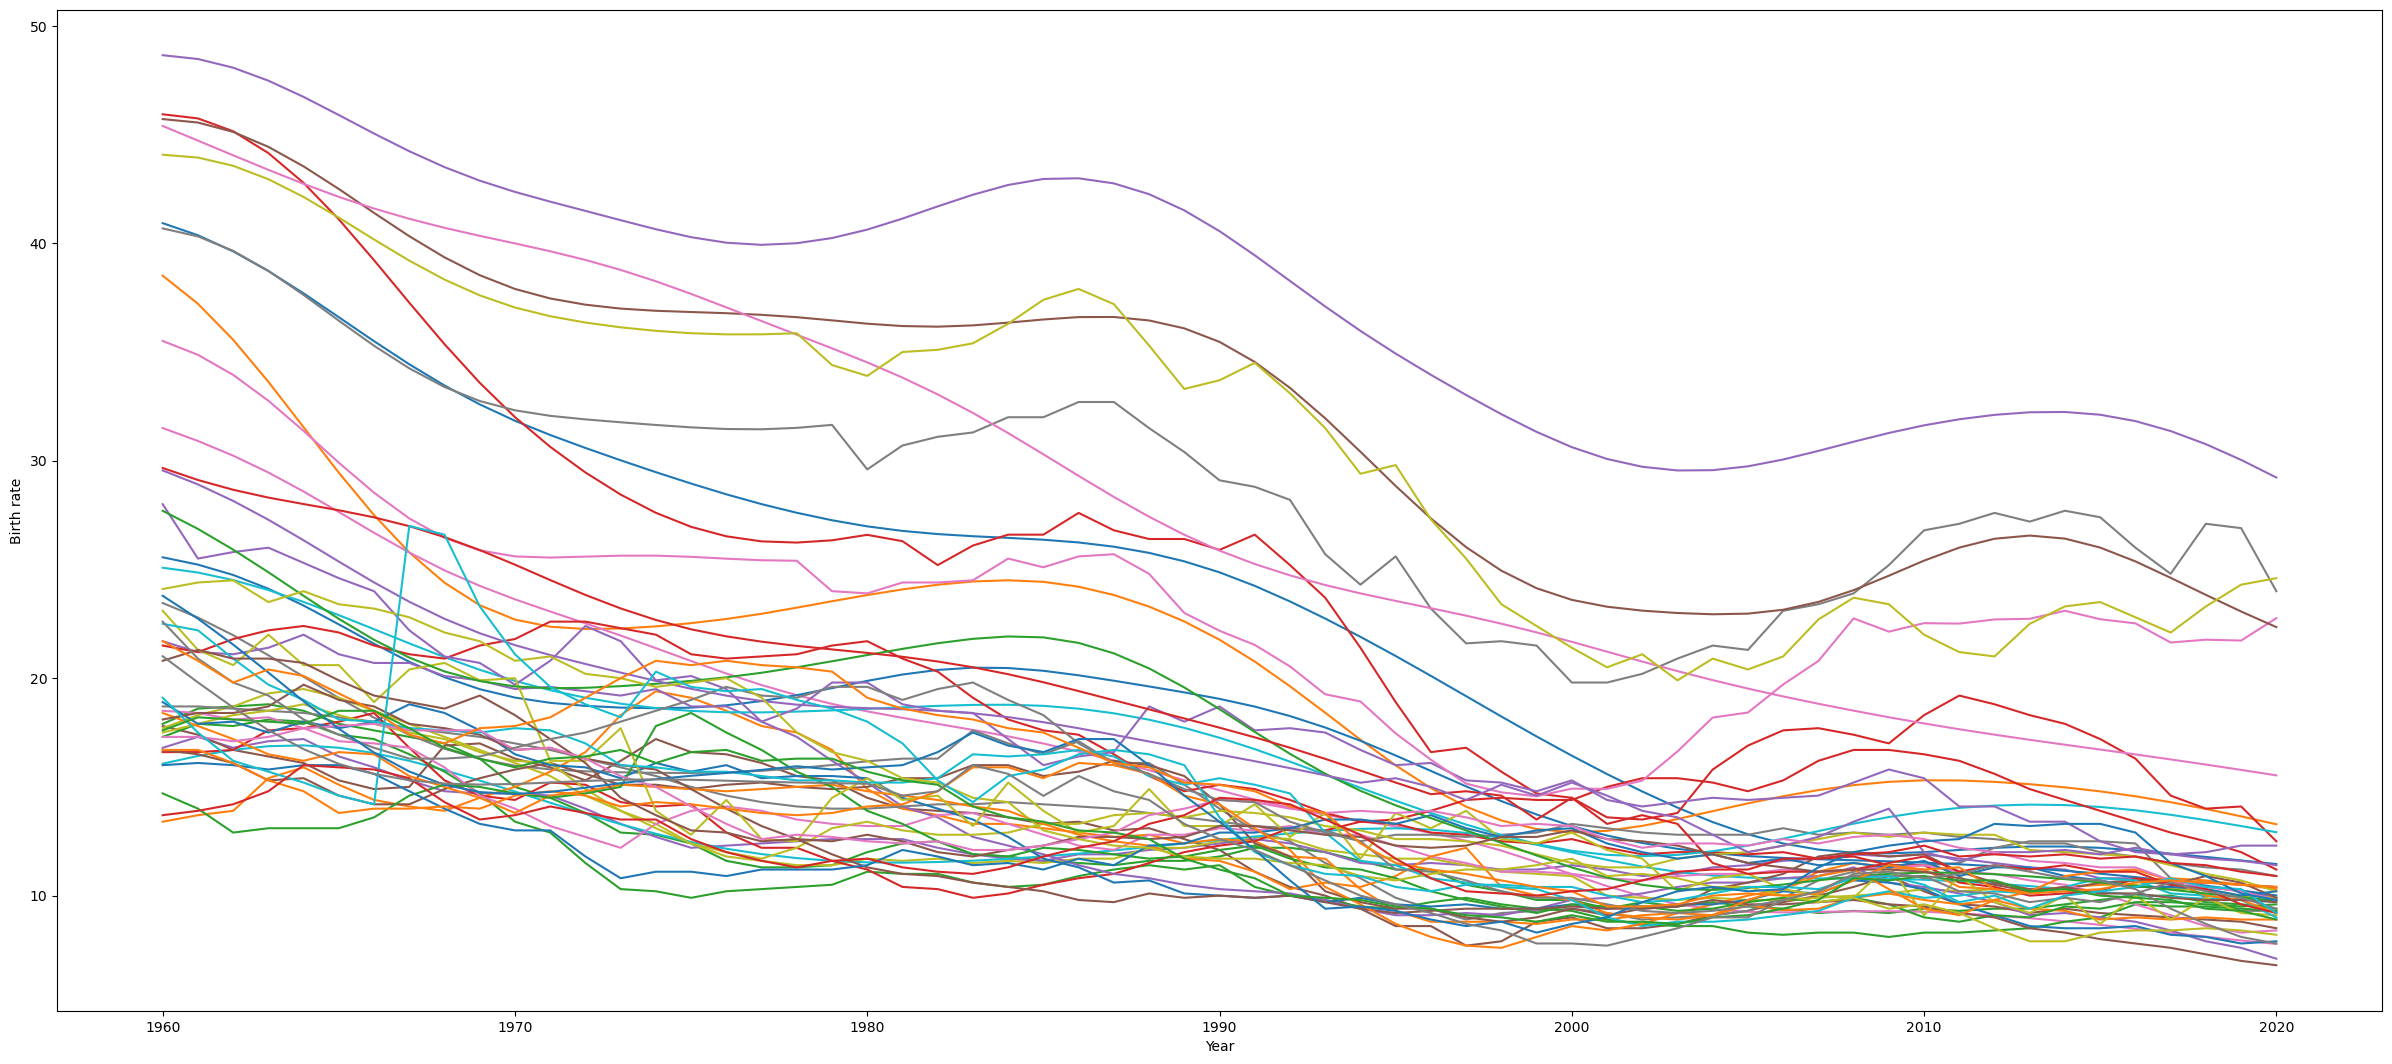

In [49]:
# plot
dfd.T.plot(figsize=(30,13), use_index=True, legend = None)

# labels
plt.xlabel('Year')
plt.ylabel('Birth rate')

### However, this plot do not showing us any deeper information about birth rates in specific countries. That’s why, for this exercise I randomly choose 10 European countries. I wanted to get full information for every year, that’s why I applied rule where selected countries must have birth rate measurement for every year. The randomly selected countries are France, Denmark, Azerbaijan, Finland, Iceland, Italy, Turkiye, United Kingdom, Bulgaria and Czech Republic.  Plot of birthrate over years for these countries is below. As you can see, more or less line plots following same pattern as last line plot. The birth rate decrease over time.

In [15]:
# random selection of conutries and save them as excel

##join countrie names + measurments
##dfsel2 = dfc.join(dfd)
##df_f = dfsel2.sample(n=10)
##df_f2 = df_f.reset_index()
##df_f2.to_excel(random.xlsx)

In [16]:
# import 10 randomly selected countries with measurments for every year
df10 = pd.read_excel(r'C:\Users\dg\Desktop\viares\1modul\random.xlsx', index_col = None)
df10

,country,year,value
0,France,1960,18.7
1,France,1961,18.7
2,France,1962,18.6
3,France,1963,18.5
4,France,1964,18.4
...,...,...,...
605,Czech Republic,2016,10.7
606,Czech Republic,2017,10.8
607,Czech Republic,2018,10.7
608,Czech Republic,2019,10.5


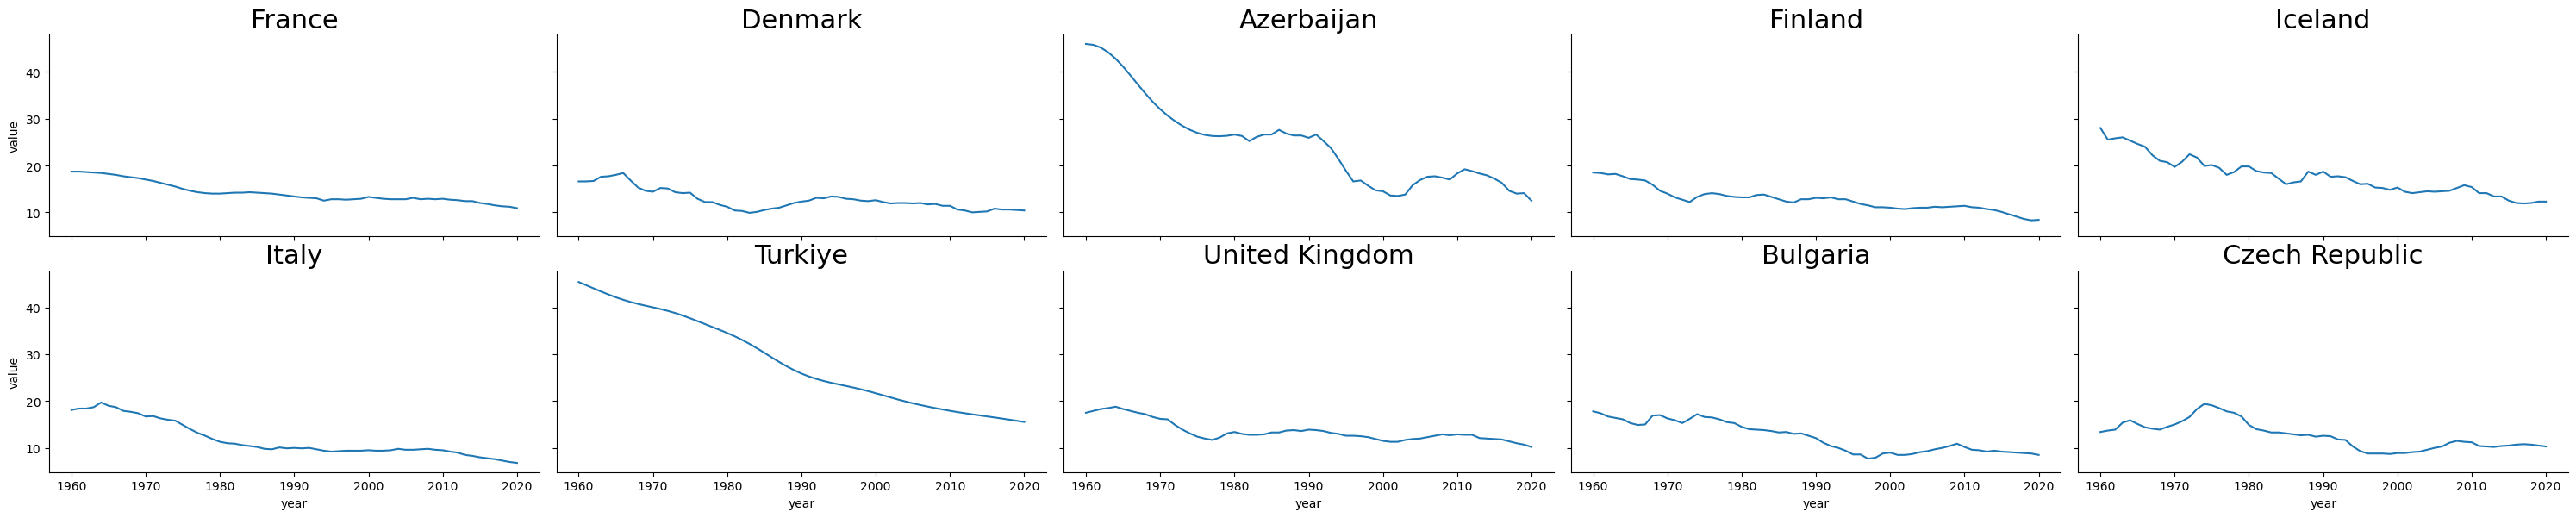

In [17]:
# separate plots of 10 randomly choosen european countries

sm = sns.FacetGrid(df10, col = 'country', col_wrap=5, height=3, aspect=2, margin_titles=True)
sm = sm.map(plt.plot, 'year', 'value')
sm.set_titles("{col_name}", size=22)

### In the last step, I wanted to see how birth rates changes in these countries over years as a heatmap choropleth. For this analyze I used Detailed World Polygons (LSIB) Europe and Southwest Asia, 2013 (https://earthworks.stanford.edu/catalog/stanford-yf665vp7551).

In [19]:
# import shp data
shape_data = gpd.GeoDataFrame.from_file(r'C:\Users\dg\Desktop\viares\1modul\shape2\yf665vp7551.shp')
shape_data.head()

,name,cc,region,iso_alpha2,iso_alpha3,iso_num,tld,geometry
0,ICELAND,IC,EUROPE-SW ASIA,IS,ISL,352.0,.is,"POLYGON ((-20.58917 63.30328, -20.60169 63.296..."
1,ICELAND,IC,EUROPE-SW ASIA,IS,ISL,352.0,.is,"POLYGON ((-20.49417 63.31753, -20.49672 63.316..."
2,ICELAND,IC,EUROPE-SW ASIA,IS,ISL,352.0,.is,"POLYGON ((-20.39083 63.33081, -20.39506 63.328..."
3,ICELAND,IC,EUROPE-SW ASIA,IS,ISL,352.0,.is,"POLYGON ((-20.39589 63.33747, -20.39672 63.334..."
4,ICELAND,IC,EUROPE-SW ASIA,IS,ISL,352.0,.is,"POLYGON ((-20.36089 63.35994, -20.36339 63.357..."


##### I show whole map, because I want to see if it is for correct geographic region or not.

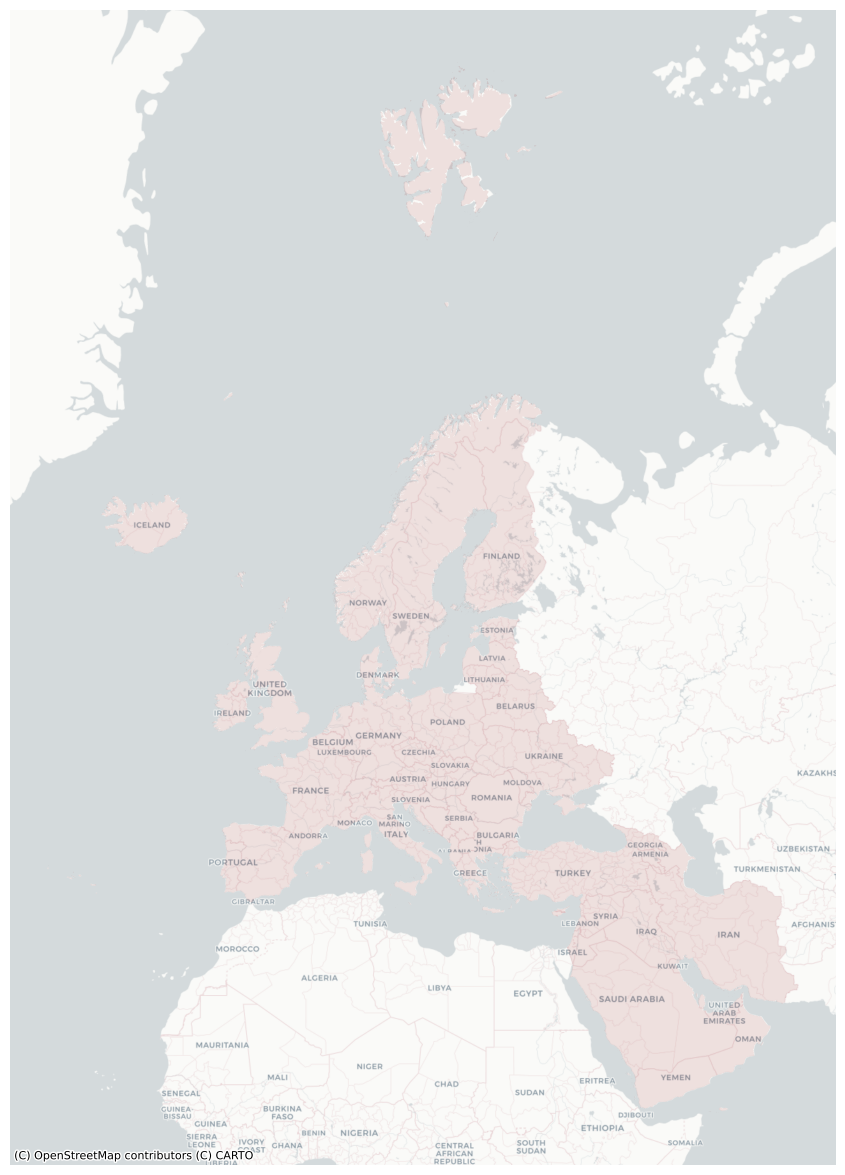

In [20]:
# polygons map from raw shp data
shape_data.to_crs(epsg=3857, inplace=True)
ax = shape_data["geometry"].plot(color="darkred", alpha=0.1, figsize=(15,15))
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()

##### For connect shp map data with my birth rate data i need to check if the names of the countries are same and correct

In [24]:
# unique country names for shp data
map_governorates = shape_data.name.unique()

# unique country names for my selected countries data
data_governorates = df10.country.unique()

In [25]:
map_governorates

array(['ICELAND', 'Jan Mayen (Norway)', 'ALBANIA', 'ANDORRA', 'ARMENIA',
       'AUSTRIA', 'AZERBAIJAN', 'Akrotiri (UK)', 'BAHRAIN', 'BELARUS',
       'BELGIUM', 'BOSNIA & HERZEGOVINA', 'BULGARIA', 'CROATIA', 'CYPRUS',
       'CZECH REPUBLIC', 'DENMARK', 'Dhekelia (UK)', 'ESTONIA', 'FINLAND',
       'FRANCE', 'Faroe Islands (DENMARK)', 'GEORGIA', 'GERMANY',
       'GREECE', 'Gaza Strip', 'Gibraltar (UK)', 'Guernsey (UK)',
       'HUNGARY', 'IRAN', 'IRAQ', 'IRELAND', 'ISRAEL', 'ITALY',
       'In dispute IRAN/UNITED ARAB EMIRATES', 'Isle of Man (UK)',
       'JORDAN', 'Jersey (UK)', 'KOSOVO', 'KUWAIT', 'LATVIA', 'LEBANON',
       'LIECHTENSTEIN', 'LITHUANIA', 'LUXEMBOURG', 'MACEDONIA', 'MALTA',
       'MOLDOVA', 'MONACO', 'MONTENEGRO', 'NETHERLANDS', 'NORWAY',
       "No Man's Land-ISRAEL/West Bank", 'OMAN', 'POLAND', 'PORTUGAL',
       'QATAR', 'ROMANIA', 'SAN MARINO', 'SAUDI ARABIA', 'SERBIA',
       'SLOVAKIA', 'SLOVENIA', 'SPAIN', 'SWEDEN', 'SWITZERLAND', 'SYRIA',
       'Svalbard (

In [26]:
data_governorates

array(['France', 'Denmark', 'Azerbaijan', 'Finland', 'Iceland', 'Italy',
       'Turkiye', 'United Kingdom', 'Bulgaria', 'Czech Republic'],
      dtype=object)

##### As you can see, names of the countries does not match. In shp data the country names represent mix of capital and small letters, while in my set each country name start with capitall letter and all other letters are small. Also, I don't know if the name of a specific country is spelled the same way in shp and my set. Therefore, I need to transform the country names into the same format for both datasets.

In [27]:
# convert country name column to string in both sets
shape_data['name'] = shape_data['name'].astype("string")
df10['country'] = df10['country'].astype("string")

# change first letter to capital and following letters to small in both sets
shape_data['name'] = shape_data['name'].str.capitalize()
df10['country'] = df10['country'].str.capitalize()

##### Now, I know both sets have same Capital and small Letters, but i don't know if specific countries are spelled in the same way. For this i use SequenceMatcher with different adjustable ratio of string match

In [28]:
# unique country names for shp data
map_governorates2 = shape_data.name.unique()

# unique country names for my data
data_governorates2 = df10.country.unique()

In [30]:
# only 100% country names match between sets
threshold = 1
same = {x for x in map_governorates2  for y in data_governorates2 if SequenceMatcher(None,x, y).ratio() == threshold}
same = list(same)
same

['Denmark',
 'France',
 'Finland',
 'Italy',
 'Czech republic',
 'Azerbaijan',
 'United kingdom',
 'Bulgaria',
 'Iceland']

In [32]:
# missing in "same" list 
df10_lst = list(df10.country.unique())
miss = [s for s in df10_lst if not any(xs in s for xs in same)]
miss

['Turkiye']

In [50]:
# missing from opposit point of view - in shp set. The threshold can be set to different value and it can be result of discussion or data knowledge
threshold2 = 0.5
miss_op = {x for x in map_governorates2  for y in miss if SequenceMatcher(None,x, y).ratio() > threshold2}
miss_op = list(miss_op)
miss_op

['Turkey']

In [36]:
# replace and make country names in shp set same as in my set
for i in not_matching:
    for k in miss_op:
        shape_data['name'] = shape_data['name'].str.replace(k,i)

In [41]:
# merge shp and my set together  
map_data = pd.merge(shape_data, df10, how="outer", left_on="name", right_on="country", indicator=False).dropna()

##### DataFrame  contain polygons data and birth rate data for every year of measurement for my 10 countries. Now, I can plot one year choroplet map as example to see if the result looks like what I want.

<AxesSubplot:>

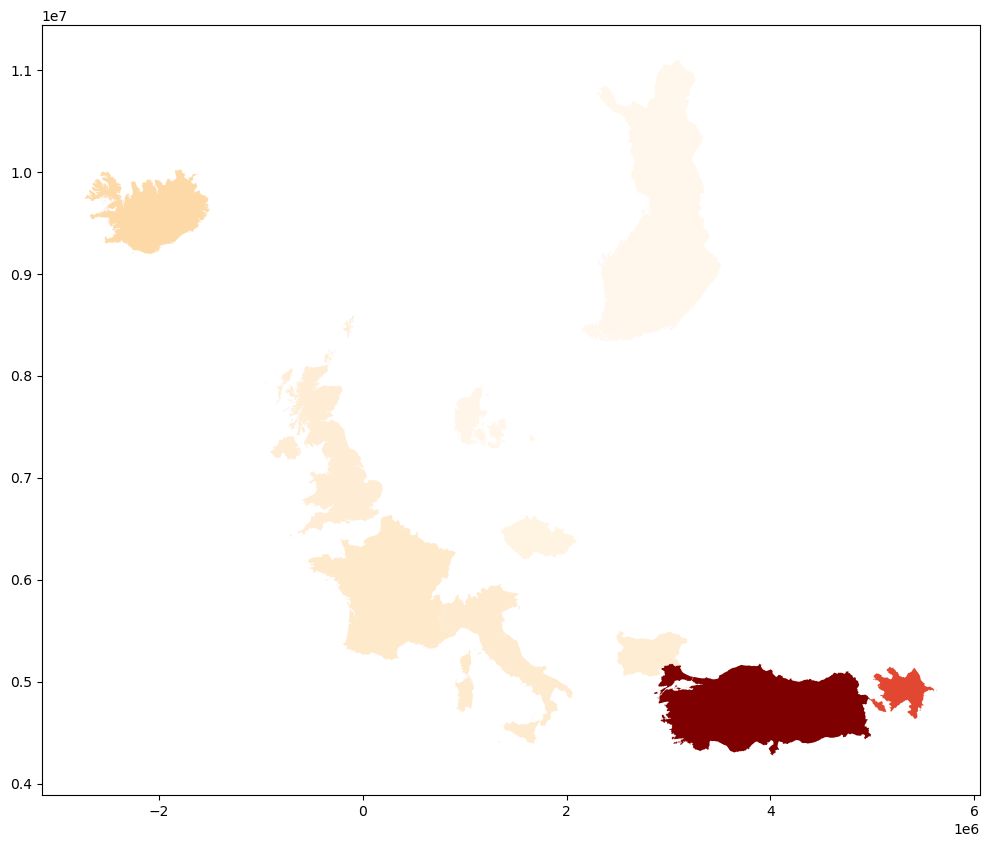

In [42]:
# plot one year - 1970
fig, ax = plt.subplots(figsize=(18,10))
md = map_data.loc[map_data.year == 1970.0]
md.plot(ax=ax, column='value', cmap='OrRd')

### Finally, in the multiple choropleth below are birth rates for selected countries for each 10 years. A darker color represents a higher birth rate compared to other countries and vice versa. The birth rate is the highest in Turkey compared to other countries in any analyzed year.

In [46]:
# list of years of interest
years_list = [1960.0, 1970.0, 1980.0, 1990.0, 2000.0, 2010.0, 2020.0]

# select data only for years in list
map_data2 = map_data[map_data['year'].isin(years_list)]

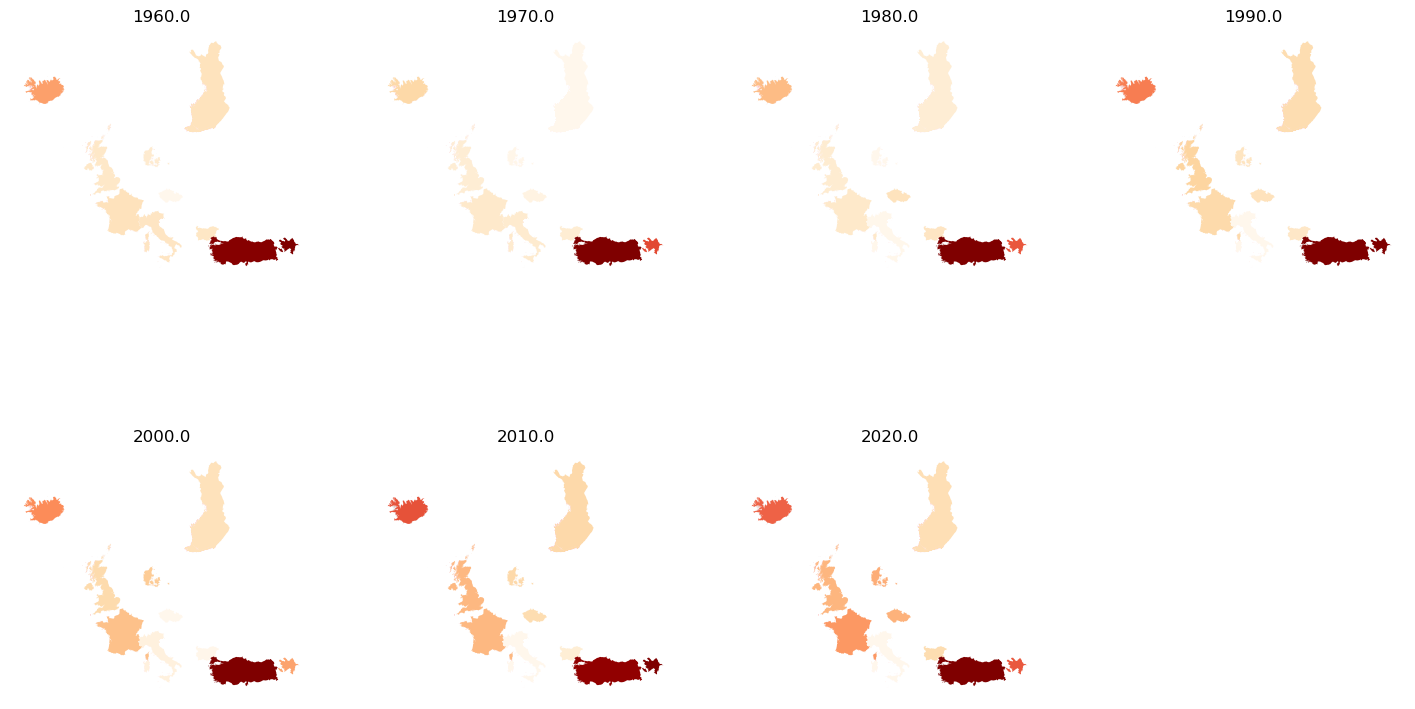

In [45]:
# plot multiple choroplet
fig = plt.figure(figsize=(18, 10))
sub_count = 1
for year in map_data2.year:
    if sub_count < 8:
        subplot = map_data2.loc[map_data2.year == year]
        ax = fig.add_subplot(2,4, sub_count)
        sub_count+=1
        ax.set_aspect('equal')
        ax.set_axis_off()
        ax.title.set_text(year)
        subplot.plot(ax=ax, column='value', cmap='OrRd')